In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
# Prepare dataset
xy = np.loadtxt('diabetes.csv', delimiter=',', dtype=np.float32)
x_data = torch.from_numpy(xy[:, :-1])
y_data = torch.from_numpy(xy[:, [-1]])

In [3]:
# Define Model
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear1 = torch.nn.Linear(8, 6)
        self.linear2 = torch.nn.Linear(6, 4)
        self.linear3 = torch.nn.Linear(4, 1)
        self.sigmoid = torch.nn.Sigmoid()
#         self.activate = torch.nn.ReLU()
        
    def forward(self, x):
        x = self.sigmoid(self.linear1(x))
        x = self.sigmoid(self.linear2(x))
        x = self.sigmoid(self.linear3(x))
#         x = self.activate(self.linear1(x))
#         x = self.activate(self.linear2(x))
#         x = self.activate(self.linear3(x))
        return x
    
model = Model()

In [4]:
# construct loss and optimizer
criterion = torch.nn.BCELoss(reduction='mean')
# optimizer = torch.optim.SGD(model.parameters(), lr=0.1)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)

In [5]:
epoch_list = []
loss_list = []

In [6]:
# Training cycle
for epoch in range(1000):
    # Forward
    y_pred = model(x_data)
    loss = criterion(y_pred, y_data)
#     print(epoch, loss.item())
    
    epoch_list.append(epoch)
    loss_list.append(loss.item())
    
    # Backward
    optimizer.zero_grad()
    loss.backward()
    
    # Update
    optimizer.step()

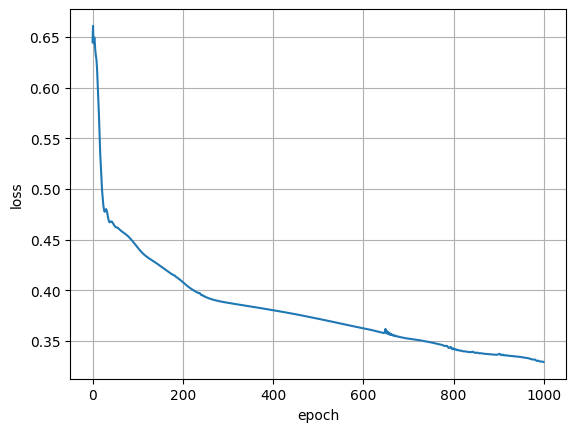

In [7]:
plt.plot(epoch_list, loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.grid()
plt.show()